This notebook provides a basic example to convert root histograms to numpy arrays 

In [1]:
import ROOT as r
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Open the ROOT TFile
filename = "histo1k.root"  # Replace with your actual file name
tfile = r.TFile(filename)

# list the file contents
tfile.ls()

# Retrieve the histogram from the TFile
histname = "randomHist1"  # Replace with your actual histogram name
histogram = tfile.Get(histname)

TFile**		histo1k.root	
 TFile*		histo1k.root	
  KEY: TH1F	randomHist1;1	Random Histogram


In [3]:
# a basic function to convert ROOT histograms into numpy arrays
def hist2np(h):
    nbin=h.GetNbinsX()
    x=np.zeros(nbin)
    y=np.zeros(nbin)
    ey=np.zeros(nbin)
    for i in range(1,nbin+1):  # bin index is 1..N
        x[i-1]=h.GetBinCenter(i)
        y[i-1]=h.GetBinContent(i)
        ey[i-1]=h.GetBinError(i)
    return x,y,ey

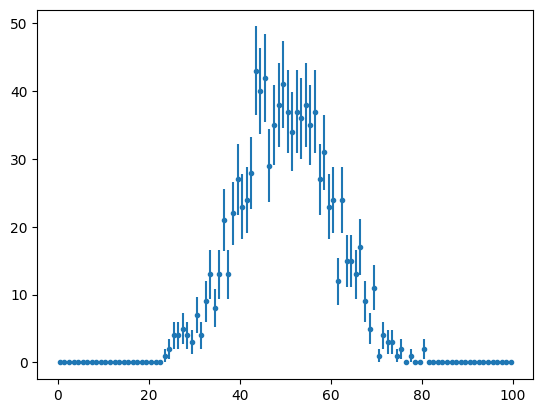

In [4]:
# Plot the histogram data with error bars
x,y,yerr = hist2np(histogram)

plt.errorbar(x, y, yerr=yerr, fmt='.');

Compare below.  Note that this histogram saved in the ROOT file had a Gaussina fit applied.  We did not extract this data above.

In [5]:
tc=r.TCanvas()
histogram.Draw("e")
tc.Draw()